In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def reaction(y, t,kf,kr):
    A, B, C= y
    dAdt = -(kf+kr)* A + kf * B + kr * C
    dBdt = -(kf+kr)* B + kr * A + kf * C
    dCdt = -(kf+kr)* C + kr * B + kf * A
    
    return [dAdt, dBdt, dCdt]

y0 = [1.33333292, 1.33333456, 2]


abserr = 2
relerr = 2
stoptime = 5
numpoints = 250
t = np.linspace(0, stoptime, numpoints)
kf = 3
kr = 1

F_values = [] 
trace_of_rho= []
time_and_F_values = []

p= odeint(reaction, y0, t, args=(kf, kr), atol=abserr, rtol=relerr)

s = odeint(reaction, p[-1], t, args=(kf, kr), atol=abserr, rtol=relerr)


for idx, (A, B, C) in enumerate(s):
    J = np.array([[-(kf+kr), kf,kr], 
                  [kr, -(kf+kr), kf],
                  [kf,kr, -(kf+kr)]])
    
    rates =np.array([[ -(kf+kr)* A + kf * B + kr * C], 
                     [ -(kf+kr)* B + kr * A + kf * C], 
                     [-(kf+kr)* C + kr * B + kf * A]])
    norm = np.linalg.norm(rates)
    normalized_rates = rates / (norm)
    row_matrix = normalized_rates.T
    print(norm)

    rho = normalized_rates @ row_matrix
    r = np.trace(rho)

    F = np.trace(J @ J.T @ rho) - (np.trace(J @ rho)) ** 2
    F_values.append(F)
    trace_of_rho.append(r)
    
    time_and_F_values.append((t[idx], F))  # Store time and F_values as a tuple

# Accessing F_values at specific times
desired_times = t  # Specify the times you're interested in
for time in desired_times:
    closest_time_idx = np.abs(t - time).argmin()
    F_at_desired_time = time_and_F_values[closest_time_idx][1]
    print(f"F_values at time {time}: {F_at_desired_time}")

# Plotting and other code remains unchanged


6.234640265616684e-06
5.521607269245635e-06
4.881665205815073e-06
4.312874788574122e-06
3.8126862329585664e-06
3.377008276247648e-06
2.9879500090124872e-06
2.6393196722049765e-06
2.3299672166343042e-06
2.0585074548489913e-06
1.8205971695152895e-06
1.6067522899528346e-06
1.416069710037701e-06
1.248159928879856e-06
1.1025167795808147e-06
9.74259323002409e-07
8.597275916446638e-07
7.587871921037918e-07
6.712446758086266e-07
5.947456911672803e-07
5.262037013351003e-07
4.6546691710272645e-07
4.1235899096085904e-07
3.6588486609947546e-07
3.240973628354999e-07
2.86834697006368e-07
2.539827101600693e-07
2.2514345053013774e-07
1.9922040399884223e-07
1.760623874810141e-07
1.5560321381497823e-07
1.3775619706907295e-07
1.2192073557959216e-07
1.0771309741153612e-07
9.510414460368903e-08
8.405629411200324e-08
7.443017212037503e-08
6.579571954992685e-08
5.80947618609847e-08
5.1310374283789006e-08
4.541997601767538e-08
4.0216189230573206e-08
3.5552501586881075e-08
3.142112015108102e-08
2.7811596399331

In [15]:
steady_state_concentrations = p[-1]
print("Steady State Concentrations: ", steady_state_concentrations)


Steady State Concentrations:  [1.55555529 1.55555556 1.55555663]


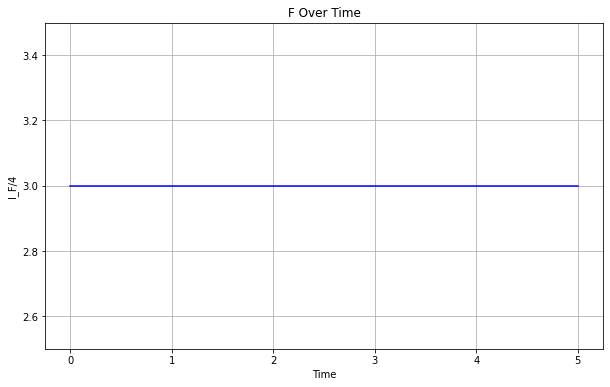

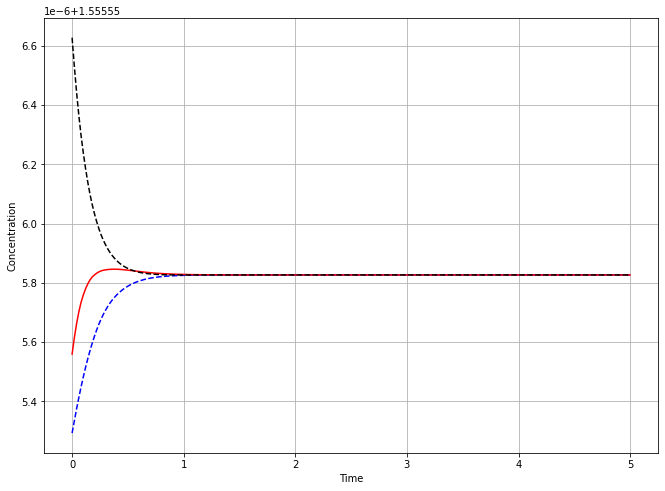

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(t, F_values, label='F over time', color='blue', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('I_F/4')
plt.title('F Over Time')
plt.ylim(2.5,3.5)
plt.grid()

plt.figure(figsize=(11, 8))
plt.plot(t, s[:,0],'--', color='blue',label = 'A')
plt.plot(t, s[:,1], color='red',label = 'B')
plt.plot(t, s[:,2],'--', color='k',label = 'C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()
